In [112]:
# Let's load values from the .env file
from dotenv import dotenv_values

config = dotenv_values()

# We also will need SQLAlchemy and its functions
from sqlalchemy import create_engine, types
from sqlalchemy.dialects.postgresql import JSON as postgres_json
from sqlalchemy import text # to be able to pass string

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this so called "line magic" command, amongst other things, stores the plots in the notebook document.
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import the statsmodels.api module
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# define variables for the login
pg_user = config['POSTGRES_USER']  # align the key label with your .env file !
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

#SQL access details
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'
engine = create_engine(url, echo=False)
engine.url # password is hidden
with engine.begin() as conn: 
    result = conn.execute(text(f'SET search_path TO {pg_schema};'))

In [114]:
with engine.begin() as conn: # Done with echo=False
    result = conn.execute(text(f'''
                               SELECT * FROM mart_song; 
                                '''))
    data = result.all()

### Let's create a dataframe out of that
df_song = pd.DataFrame(data) 

In [115]:
df_song.columns

Index(['year', 'semi_final', 'semi_draw_position', 'final_draw_position',
       'country', 'artist_name', 'song_name', 'language', 'style',
       'direct_qualifier_10', 'gender', 'main_singers', 'key', 'loudness_db',
       'beats_per_min', 'energy', 'danceability', 'happiness', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'backing_dancers',
       'backing_singers', 'backing_instruments', 'instrument_10',
       'qualified_10', 'final_televote_points', 'final_jury_points',
       'final_televote_votes', 'final_jury_votes', 'final_place',
       'final_total_points', 'semi_place', 'semi_televote_points',
       'semi_jury_points', 'semi_total_points', 'favourite_10', 'host_10',
       'point_ratio'],
      dtype='object')

7.	df.corr(method=’pearson’, numeric_only=True): gives Pearson’s correlation between all columns in a dataset using only numeric data
a.	Using Matplotly:
ax =plt.subplots(figsize=(8,6))
sns.heatmap(pearsoncorr, 
 xticklabels=pearsoncorr.columns,
           	 yticklabels=pearsoncorr.columns,
            	cmap='Greens',
            	annot=True)
b.	Using Seaborn
i.	sns.heatmap(pearsoncorr, cmap='Blues', annot=True)


In [116]:
song_correlations.columns

Index(['year', 'semi_final', 'semi_draw_position', 'final_draw_position',
       'country', 'artist_name', 'song_name', 'language',
       'direct_qualifier_10', 'main_singers', 'loudness_db', 'beats_per_min',
       'energy', 'danceability', 'happiness', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'backing_dancers',
       'backing_singers', 'backing_instruments', 'instrument_10',
       'qualified_10', 'final_televote_points', 'final_jury_points',
       'final_televote_votes', 'final_jury_votes', 'semi_place',
       'semi_televote_points', 'semi_jury_points', 'semi_total_points',
       'favourite_10', 'host_10', 'point_ratio', 'key_A Major', 'key_A Minor',
       'key_Ab Major', 'key_Ab Minor', 'key_B Major', 'key_B Minor',
       'key_Bb Major', 'key_Bb Minor', 'key_C Major', 'key_C Minor',
       'key_Cs Major', 'key_Cs Minor', 'key_D Major', 'key_D Minor',
       'key_Db Major', 'key_Db Minor', 'key_E Major', 'key_E Minor',
       'key_Eb Major', 'key_

In [128]:
# making dummies for string columns

song_correlations = pd.get_dummies(df_song, columns=['key', 'style', 'gender'], drop_first=True, dtype='int')

# point_ratio is an object

song_correlations['point_ratio'] = song_correlations['point_ratio'].astype('float')

# reordering columns 

song_correlations = song_correlations[['point_ratio', 'semi_final', 'semi_draw_position', 
        'final_draw_position','country', 'artist_name', 'song_name', 'language',
       'direct_qualifier_10', 'main_singers', 'loudness_db', 'beats_per_min',
       'energy', 'danceability', 'happiness', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'backing_dancers',
       'backing_singers', 'backing_instruments', 'instrument_10',
       'qualified_10', 'final_televote_points', 'final_jury_points',
       'final_televote_votes', 'final_jury_votes', 'semi_place', 'semi_televote_points',
       'semi_jury_points', 'semi_total_points', 'favourite_10', 'host_10',
        'key_A Major', 'key_A Minor', 'key_Ab Major',
       'key_Ab Minor', 'key_B Major', 'key_B Minor', 'key_Bb Major',
       'key_Bb Minor', 'key_C Major', 'key_C Minor', 'key_Cs Major',
       'key_Cs Minor', 'key_D Major', 'key_D Minor', 'key_Db Major',
       'key_Db Minor', 'key_E Major', 'key_E Minor', 'key_Eb Major',
       'key_Eb Minor', 'key_F Major', 'key_F Minor', 'key_Fs Major',
       'key_Fs Minor', 'key_G Major', 'key_G Minor', 'style_Dance',
       'style_Opera', 'style_Pop', 'style_Rock', 'style_Traditional',
       'gender_Male', 'gender_Mix', 'final_place','final_total_points']]

#checking for correlations

correlations = song_correlations.corr(method='pearson', numeric_only=True)

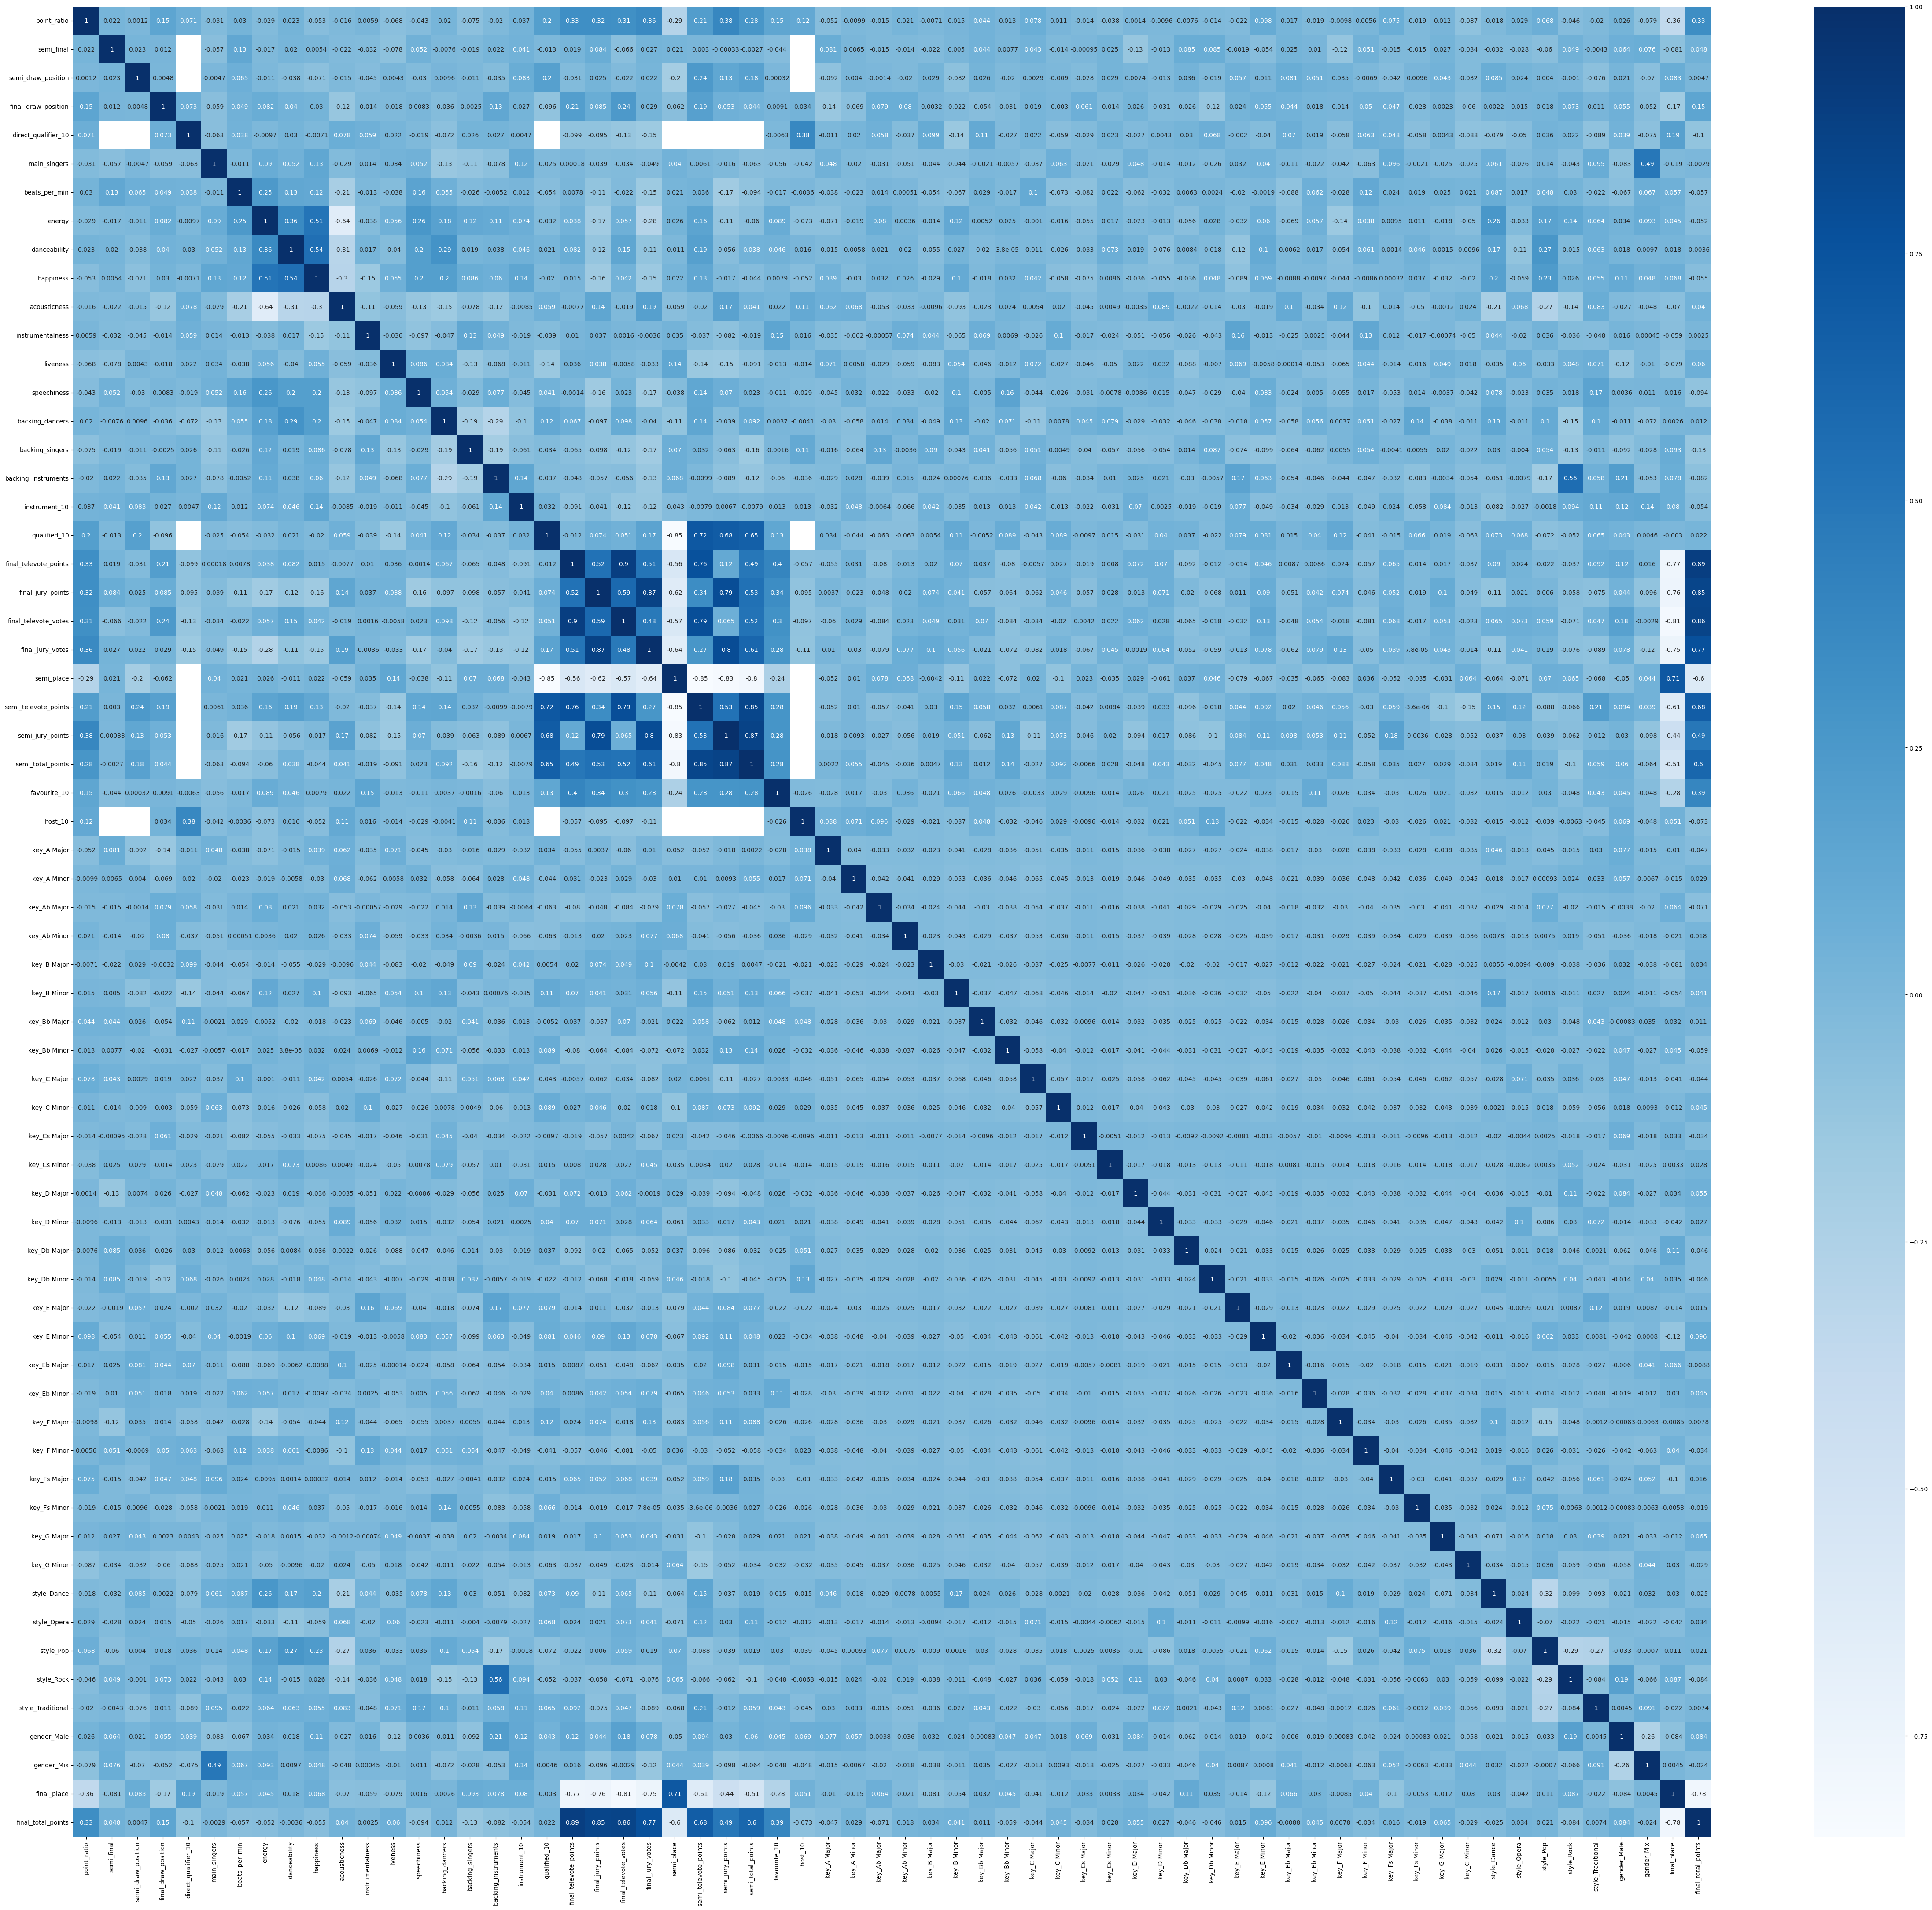

In [129]:
ax =plt.subplots(figsize=(60,54))
sns.heatmap(correlations, 
 xticklabels=correlations.columns,
           	 yticklabels=correlations.columns,
            	cmap='Blues',
            	annot=True)
plt.savefig('heatmap all variables');

Columns with correlations on final_place > .05 or < .05: point_ratio, semi_final, final_draw_position, beats_per_min, happiness, acousticness, instrumentalness, liveness, backing_singers, backing_instruments, instrument_10, host_10, key_Ab Major, key_B Minor, key_B Minor, key_Db Major, key_E Minor, key_Eb Major, key_Fs Major, style_Rock, gender_Male

In [12]:
filter = ((df_song['beats_per_min'].notnull()) & (df_song['energy'].notnull()) & (df_song['danceability'].notnull()) & 
          (df_song['happiness'].notnull()) & (df_song['acousticness'].notnull()) & (df_song['instrumentalness'].notnull()) 
          & (df_song['liveness'].notnull()) & (dfod_song['speechiness'].notnull()) & (df_song['final_total_points'].notnull()))
df_song_filter = df_song[filter]

In [13]:
#convert "team" to dummy variable
df_song_model = pd.get_dummies(df_song_filter, columns=['key', 'style'], drop_first=True, dtype='int')

In [175]:
# Choose the independent variable, the predictor X  

X = df_song_model[['beats_per_min','energy', 'danceability', 'happiness', 
        'acousticness', 'instrumentalness', 'liveness', 'speechiness', 
        'key_A Minor', 'key_Ab Major', 'key_Ab Minor', 'key_B Major', 
        'key_B Minor', 'key_Bb Major', 'key_Bb Minor', 'key_C Minor',
       'key_Cs Minor', 'key_D Major', 'key_D Minor', 'key_Db Major',
       'key_Db Minor', 'key_E Major', 'key_E Minor', 'key_Eb Major',
       'key_Eb Minor', 'key_F Major', 'key_F Minor', 'key_Fs Major',
       'key_Fs Minor', 'key_G Major', 'key_G Minor', 'style_Dance',
       'style_Opera', 'style_Pop', 'style_Rock', 'style_Traditional']]

# X = df_song_model[['main_singers', 'beats_per_min', 'energy',
#        'danceability', 'happiness', 'acousticness', 'instrumentalness',
#        'liveness', 'speechiness', 'backing_dancers', 'backing_singers',
#        'backing_instruments', 'point_ratio', 'betting_odds', 'gender_Male',
#        'gender_Mix', 'key_A Minor', 'key_Ab Major', 'key_Ab Minor',
#        'key_B Major', 'key_B Minor', 'key_Bb Major', 'key_Bb Minor',
#        'key_C Major', 'key_C Minor', 'key_Cs Major', 'key_Cs Minor',
#        'key_D Major', 'key_D Minor', 'key_Db Major', 'key_Db Minor',
#        'key_E Major', 'key_E Minor', 'key_Eb Major', 'key_Eb Minor',
#        'key_F Major', 'key_F Minor', 'key_Fs Major', 'key_Fs Minor',
#        'key_G Major', 'key_G Minor', 'style_Dance', 'style_Opera', 'style_Pop',
#        'style_Rock', 'style_Traditional', 'loudness_db_11', 'loudness_db_12',
#        'loudness_db_13', 'loudness_db_2', 'loudness_db_3', 'loudness_db_4',
#        'loudness_db_5', 'loudness_db_6', 'loudness_db_7', 'loudness_db_8',
#        'loudness_db_9']]

# 'style', 'gender', 'key' removed

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = df_song_model[['final_total_points']]


In [176]:
# dividing the dataset into two subsets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42) #splittin the data into train and test dataset, 30% test 70% train

# Since our statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
Xtrain = sm.add_constant(Xtrain)
display(Xtrain.head())

,const,beats_per_min,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,key_A Minor,...,key_F Minor,key_Fs Major,key_Fs Minor,key_G Major,key_G Minor,style_Dance,style_Opera,style_Pop,style_Rock,style_Traditional
75,1.0,95.0,76.0,39.0,41.0,0.0,79.0,12.0,3.0,0,...,0,0,0,0,0,0,0,0,1,0
106,1.0,120.0,85.0,73.0,12.0,16.0,1.0,10.0,5.0,1,...,0,0,0,0,0,0,0,1,0,0
169,1.0,140.0,67.0,55.0,54.0,21.0,0.0,12.0,4.0,0,...,0,0,1,0,0,0,0,1,0,0
49,1.0,110.0,42.0,55.0,23.0,70.0,0.0,14.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
136,1.0,83.0,50.0,52.0,25.0,31.0,0.0,10.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# create an OLS model
song_model = sm.OLS(ytrain, Xtrain)

# use the data to calculate the intercept and slope
model_results = song_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     final_total_points   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9785
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.520
Time:                        14:47:00   Log-Likelihood:                -551.38
No. Observations:                  88   AIC:                             1175.
Df Residuals:                      52   BIC:                             1264.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.4513    195.619      0.273      0.786    -339.086     445.989
beats_per_min        -0.4585      0.986     -0.465      0.644      -2.436       1.519
energy                1.7978      2.158      0.833      0.409      -2.532       6.127
danceability         -2.3852      1.941     -1.229      0.225      -6.280       1.509
happiness            -0.4187      1.331     -0.315      0.754      -3.090       2.252
acousticness          3.5775      1.608      2.225      0.030       0.351       6.804
instrumentalness      0.7882      1.976      0.399      0.692      -3.176       4.753
liveness              0.6621      2.139      0.310      0.758      -3.629       4.954
speechiness          -0.4723      7.071     -0.067      0.947     -14.661      13.716
key_A Minor          43.0858    106.869      0.403      0.688    -171.362     257.533
key_Ab Major        -32.8135    101.654     -0.323      0.748    -236.797     171.170
key_Ab Minor         90.3843    119.510      0.756      0.453    -149.431     330.199
key_B Major         109.5675    192.166      0.570      0.571    -276.041     495.176
key_B Minor         204.8877    123.452      1.660      0.103     -42.837     452.612
key_Bb Major        154.2774    118.269      1.304      0.198     -83.046     391.601
key_Bb Minor        -47.8854     99.126     -0.483      0.631    -246.796     151.025
key_C Minor          42.9103    116.207      0.369      0.713    -190.276     276.097
key_Cs Minor        151.7346    142.919      1.062      0.293    -135.053     438.522
key_D Major         329.1265    112.073      2.937      0.005     104.236     554.017
key_D Minor          10.3957    113.803      0.091      0.928    -217.966     238.757
key_Db Major         14.4131    105.098      0.137      0.891    -196.481     225.308
key_Db Minor         26.0582    188.126      0.139      0.890    -351.444     403.560
key_E Major        -140.0420    169.502     -0.826      0.412    -480.173     200.089
key_E Minor          15.6104    102.999      0.152      0.880    -191.073     222.293
key_Eb Major         54.4568    150.421      0.362      0.719    -247.384     356.298
key_Eb Minor        230.7502    136.068      1.696      0.096     -42.290     503.790
key_F Major          -5.4378    143.903     -0.038      0.970    -294.200     283.324
key_F Minor         -33.0287    109.817     -0.301      0.765    -253.394     187.336
key_Fs Major        394.8227    185.598      2.127      0.038      22.392     767.253
key_Fs Minor        -35.9187    105.672     -0.340      0.735    -247.964     176.127
key_G Major         -31.6648    109.388     -0.289      0.773    -251.168     187.838
key_G Minor          29.9207    119.338      0.251      0.803    -209.548     269.390
style_Dance         336.7686    153.406      2.195      0.033      28.938

In [178]:
# Add a constant to the test data for the intercept
Xtest = sm.add_constant(Xtest)

# Make predictions using the test data
y_pred = model_results.predict(Xtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R^2)
r2 = r2_score(ytest, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 49773.46034841531
Root Mean Squared Error (RMSE): 223.09966460847787
R-squared (R^2): -1.5923270704628747


In [179]:
# adding test values and predicted values + calculating squared error for each record
y_pred.name = 'final_total_points_pred' # assigning a name to the y_pred Series, to get a column name below
df_eval = pd.concat([Xtest, ytest, y_pred], axis=1)
df_eval['squared_error'] = (df_eval['final_total_points'] - df_eval['final_total_points_pred'])**2
df_eval

,const,beats_per_min,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,key_A Minor,...,key_G Major,key_G Minor,style_Dance,style_Opera,style_Pop,style_Rock,style_Traditional,final_total_points,final_total_points_pred,squared_error
45,1.0,95.0,59.0,73.0,35.0,4.0,0.0,31.0,5.0,0,...,0,0,0,0,1,0,0,472.0,328.261910,20660.638505
177,1.0,79.0,63.0,33.0,55.0,26.0,0.0,27.0,5.0,0,...,0,0,0,0,1,0,0,173.0,480.019901,94261.219563
134,1.0,102.0,70.0,89.0,65.0,20.0,0.0,7.0,19.0,0,...,0,0,0,0,0,0,1,204.0,-6.936596,44494.247623
93,1.0,93.0,56.0,68.0,50.0,9.0,0.0,31.0,3.0,0,...,0,0,0,0,0,0,0,128.0,-20.338152,22004.207448
71,1.0,124.0,79.0,60.0,62.0,5.0,0.0,6.0,3.0,0,...,0,0,0,0,1,0,0,153.0,332.731140,32303.282583
155,1.0,117.0,81.0,75.0,76.0,2.0,0.0,7.0,10.0,0,...,0,0,0,0,1,0,0,181.0,189.199465,67.231229
133,1.0,120.0,76.0,69.0,51.0,0.0,1.0,13.0,5.0,0,...,0,0,0,0,1,0,0,115.0,298.901047,33819.594953
196,1.0,93.0,18.0,52.0,25.0,69.0,0.0,9.0,3.0,0,...,1,0,0,0,0,0,0,170.0,128.392432,1731.189702
180,1.0,126.0,79.0,59.0,52.0,15.0,0.0,21.0,11.0,1,...,0,0,1,0,0,0,0,38.0,417.429556,143966.787611
103,1.0,102.0,90.0,57.0,31.0,0.0,0.0,12.0,8.0,0,...,0,0,0,0,0,1,0,36.0,211.852546,30924.117869


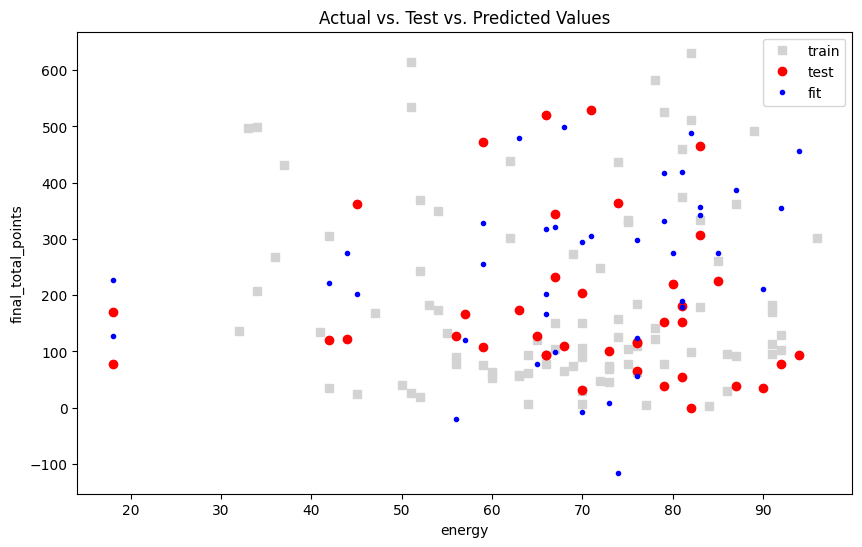

In [185]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['energy'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['energy'], ytest, 'ro', label="test")
plt.plot(Xtest['energy'], y_pred, 'bo', markersize=3, label="fit")

# # Add residuals (dashed lines)
# for i in range(len(Xtest)):
#     plt.plot([Xtest['energy'].iloc[i], Xtest['energy'].iloc[i]], 
#               [ytest.iloc[i], y_pred.iloc[i]], 
#               'k--', linewidth=0.5)

# Add labels and title
plt.xlabel('energy')
plt.ylabel('final_total_points')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
plt.savefig('terrible predictive model');

In [25]:
# removing null values

filter = ((df_song['beats_per_min'].notnull()) & (df_song['energy'].notnull()) & (df_song['acousticness'].notnull()) & 
          (df_song['point_ratio'].notnull()) & (df_song['backing_singers'].notnull()) & (df_song['semi_place'].notnull()) 
          & (df_song['final_total_points'].notnull()))
df_song_filter = df_song[filter]

# selecting only columns with corralations
df_song_refined = df_song_filter[['beats_per_min','energy','acousticness','point_ratio','backing_singers','semi_place','final_total_points','key','style']]

# making dummies for key and style
df_song_refined=pd.get_dummies(df_song_refined, columns=['key', 'style'], drop_first=True, dtype='int')

In [30]:
# Choose the independent variable, the predictor X  

X = df_song_refined[['beats_per_min','energy',
        'acousticness', 'point_ratio', 'backing_singers', 'semi_place']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = df_song_refined[['final_total_points']]

In [206]:
# dividing the dataset into two subsets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42) #splittin the data into train and test dataset, 20% test 70% train

# Since our statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
Xtrain = sm.add_constant(Xtrain)
display(Xtrain.head())

,const,beats_per_min,energy,acousticness,point_ratio,backing_singers,semi_place
513,1.0,112.0,68.0,1.0,0.192267,0,1.0
459,1.0,123.0,47.0,21.0,0.098101,5,7.0
192,1.0,140.0,60.0,1.0,0.043788,0,8.0
352,1.0,135.0,87.0,2.0,0.091358,0,2.0
169,1.0,85.0,51.0,9.0,0.098101,0,4.0


In [207]:
# create an OLS model
song_model = sm.OLS(ytrain, Xtrain)

# use the data to calculate the intercept and slope
model_results = song_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     final_total_points   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     21.79
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           2.11e-19
Time:                        11:28:03   Log-Likelihood:                -1203.4
No. Observations:                 196   AIC:                             2421.
Df Residuals:                     189   BIC:                             2444.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             294.8908     63.164      4.669      0.000     170.294     419.487
beats_per_min      -0.1006      0.370     -0.272      0.786      -0.830       0.629
energy             -0.4887      0.570     -0.857      0.393      -1.614       0.636
acousticness        0.0773      0.429      0.180      0.857      -0.769       0.923
point_ratio       608.8535    163.248      3.730      0.000     286.832     930.875
backing_singers     0.6784      5.418      0.125      0.900     -10.010      11.366
semi_place        -27.3900      2.949     -9.288      0.000     -33.207     -21.573
==============================================================================
Omnibus:                       14.141   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.983
Skew:                           0.303   Prob(JB):                     5.09e-07
Kurtosis:                       4.784   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
# Add a constant to the test data for the intercept
Xtest = sm.add_constant(Xtest)

# Make predictions using the test data
y_pred = model_results.predict(Xtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R^2)
r2 = r2_score(ytest, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 11271.699349084874
Root Mean Squared Error (RMSE): 106.16825961220648
R-squared (R^2): 0.4688846719043257


In [210]:
# adding test values and predicted values + calculating squared error for each record
y_pred.name = 'final_total_points_pred' # assigning a name to the y_pred Series, to get a column name below
df_eval = pd.concat([Xtest, ytest, y_pred], axis=1)
df_eval['squared_error'] = (df_eval['final_total_points'] - df_eval['final_total_points_pred'])**2
df_eval

,const,beats_per_min,energy,acousticness,point_ratio,backing_singers,semi_place,final_total_points,final_total_points_pred,squared_error
45,1.0,142.0,88.0,41.0,0.127028,0,8.0,253.0,98.999768,23716.071547
9,1.0,125.0,86.0,36.0,0.127028,2,5.0,96.0,184.826870,7890.212813
325,1.0,122.0,49.0,40.0,0.242768,0,2.0,372.0,354.799592,295.854032
465,1.0,125.0,96.0,0.0,0.242768,2,1.0,327.0,357.186407,911.219191
429,1.0,102.0,96.0,18.0,0.192267,0,5.0,226.0,219.226212,45.884198
373,1.0,132.0,68.0,1.0,0.115297,3,5.0,0.0,183.749333,33763.817501
413,1.0,80.0,82.0,1.0,0.084761,1,10.0,50.0,25.239034,613.105459
252,1.0,130.0,91.0,1.0,0.095441,0,8.0,96.0,76.417345,383.480361
14,1.0,155.0,79.0,0.0,0.096525,0,1.0,526.0,272.079771,64475.482463
207,1.0,91.0,65.0,4.0,0.144128,4,8.0,120.0,125.632545,31.725564


AttributeError: 'Figure' object has no attribute 'plot'

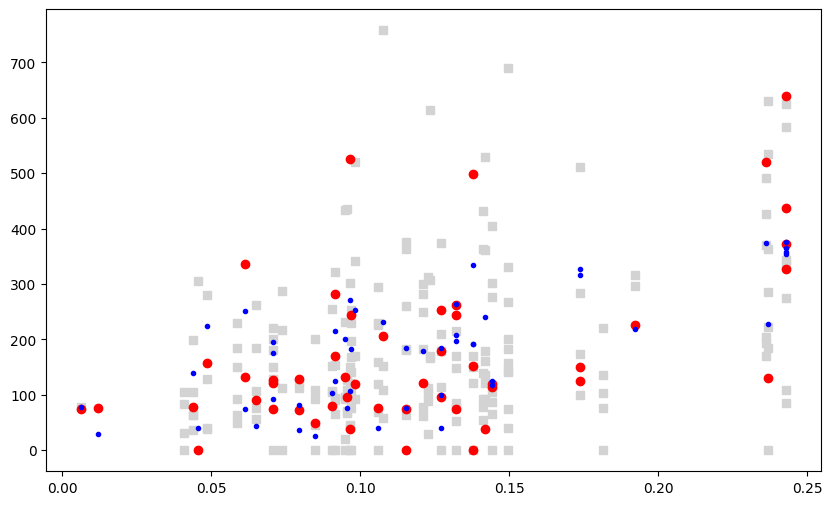

In [217]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['point_ratio'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['point_ratio'], ytest, 'ro', label="test")
plt.plot(Xtest['point_ratio'], y_pred, 'bo', markersize=3, label="fit")

# # Add residuals (dashed lines)
# for i in range(len(Xtest)):
#     plt.plot([Xtest['point_ratio'].iloc[i], Xtest['point_ratio'].iloc[i]], 
#               [ytest.iloc[i], y_pred.iloc[i]], 
#               'k--', linewidth=0.5)

# plotting the regression line with the help of our calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("final_total_points");
ax.set_xlabel("point_ratio");

# Add labels and title
plt.xlabel('point_ratio')
plt.ylabel('final_total_points')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
#plt.savefig('terrible predictive model');

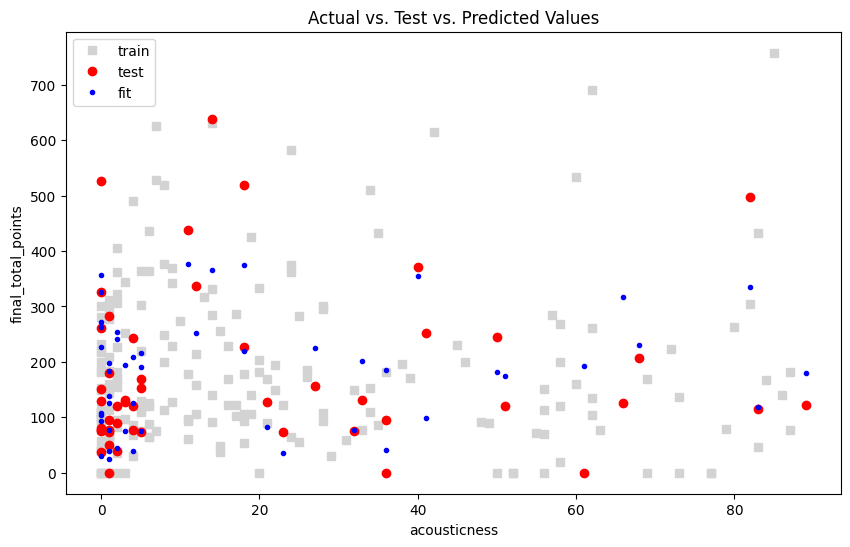

In [212]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['acousticness'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['acousticness'], ytest, 'ro', label="test")
plt.plot(Xtest['acousticness'], y_pred, 'bo', markersize=3, label="fit")

# # Add residuals (dashed lines)
# for i in range(len(Xtest)):
#     plt.plot([Xtest['energy'].iloc[i], Xtest['energy'].iloc[i]], 
#               [ytest.iloc[i], y_pred.iloc[i]], 
#               'k--', linewidth=0.5)

# Add labels and title
plt.xlabel('acousticness')
plt.ylabel('final_total_points')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
#plt.savefig('terrible predictive model');

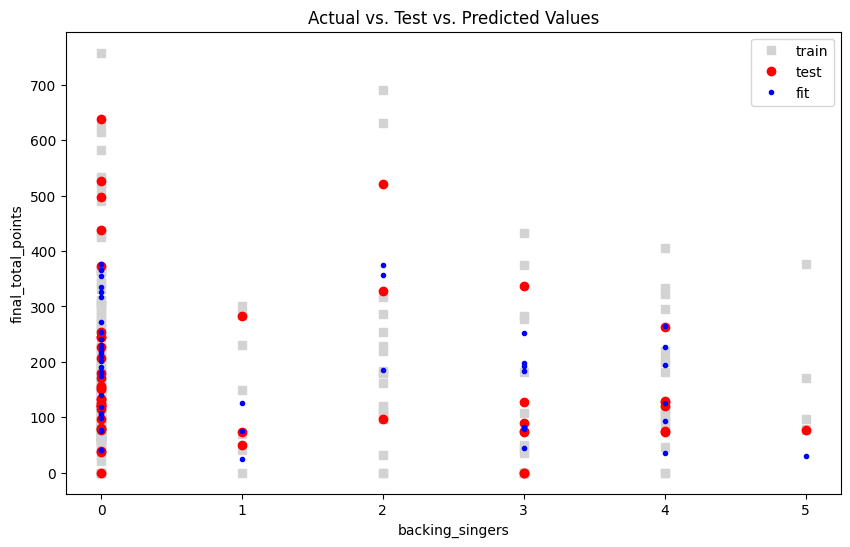

In [218]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['backing_singers'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['backing_singers'], ytest, 'ro', label="test")
plt.plot(Xtest['backing_singers'], y_pred, 'bo', markersize=3, label="fit")

# # Add residuals (dashed lines)
# for i in range(len(Xtest)):
#     plt.plot([Xtest['energy'].iloc[i], Xtest['energy'].iloc[i]], 
#               [ytest.iloc[i], y_pred.iloc[i]], 
#               'k--', linewidth=0.5)

# Add labels and title
plt.xlabel('backing_singers')
plt.ylabel('final_total_points')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
#plt.savefig('terrible predictive model');

In [132]:
# Trying a new predictive model using the heatmapped variables

new_model_df = song_correlations[['point_ratio', 'final_place', 'final_draw_position', 'beats_per_min', 
                             'happiness', 'acousticness', 'instrumentalness', 'liveness', 'backing_singers', 
                             'backing_instruments', 'instrument_10', 'host_10', 'key_Ab Major', 'key_B Minor', 
                             'key_B Minor', 'key_Db Major', 'key_E Minor', 'key_Eb Major', 'key_Fs Major', 
                             'style_Rock', 'gender_Male']]

# removing null values

filter = ((new_model_df['final_draw_position'].notnull()) & (new_model_df['final_place'].notnull()) & (new_model_df['beats_per_min'].notnull()) & (new_model_df['happiness'].notnull()) & (new_model_df['acousticness'].notnull()) & 
          (new_model_df['point_ratio'].notnull()) & (new_model_df['backing_singers'].notnull()) & (new_model_df['host_10'].notnull()))
new_model_df = new_model_df[filter]

new_model_df.isnull().sum()

point_ratio            0
final_place            0
final_draw_position    0
beats_per_min          0
happiness              0
acousticness           0
instrumentalness       0
liveness               0
backing_singers        0
backing_instruments    0
instrument_10          0
host_10                0
key_Ab Major           0
key_B Minor            0
key_B Minor            0
key_Db Major           0
key_E Minor            0
key_Eb Major           0
key_Fs Major           0
style_Rock             0
gender_Male            0
dtype: int64

In [135]:
# Choose the independent variable, the predictor X  

X = new_model_df[['point_ratio', 'final_draw_position', 'beats_per_min', 
                             'happiness', 'acousticness', 'instrumentalness', 'liveness', 'backing_singers', 
                             'backing_instruments', 'instrument_10', 'host_10', 'key_Ab Major', 'key_B Minor', 
                             'key_B Minor', 'key_Db Major', 'key_E Minor', 'key_Eb Major', 'key_Fs Major', 
                             'style_Rock', 'gender_Male']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = new_model_df[['final_place']]


In [136]:
# dividing the dataset into two subsets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42) #splittin the data into train and test dataset, 20% test 70% train

# Since our statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
Xtrain = sm.add_constant(Xtrain)
display(Xtrain.head())

,const,point_ratio,final_draw_position,beats_per_min,happiness,acousticness,instrumentalness,liveness,backing_singers,backing_instruments,...,key_B Minor,key_B Minor,key_B Minor,key_B Minor,key_Db Major,key_E Minor,key_Eb Major,key_Fs Major,style_Rock,gender_Male
348,1.0,0.137738,18.0,146.0,37.0,0.0,0.0,25.0,0,4,...,0,0,0,0,0,0,0,0,1,1
255,1.0,0.131944,2.0,103.0,17.0,0.0,0.0,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,1.0,0.240391,20.0,101.0,73.0,5.0,0.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1.0,0.208074,26.0,120.0,31.0,8.0,0.0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,1.0,0.161132,11.0,102.0,50.0,5.0,0.0,6.0,0,0,...,1,1,1,1,0,0,0,0,0,0


In [137]:
# create an OLS model
song_model = sm.OLS(ytrain, Xtrain)

# use the data to calculate the intercept and slope
model_results = song_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_place   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.447
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           4.24e-06
Time:                        11:50:58   Log-Likelihood:                -835.63
No. Observations:                 252   AIC:                             1711.
Df Residuals:                     232   BIC:                             1782.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  23.1796      3.307      7.010      0.000      16.665      29.694
point_ratio           -42.3136      8.423     -5.024      0.000     -58.908     -25.719
final_draw_position    -0.1976      0.062     -3.185      0.002      -0.320      -0.075
beats_per_min           0.0141      0.019      0.725      0.469      -0.024       0.052
happiness               0.0155      0.022      0.708      0.480      -0.028       0.059
acousticness           -0.0196      0.018     -1.064      0.288      -0.056       0.017
instrumentalness       -0.0226      0.025     -0.889      0.375      -0.073       0.027
liveness               -0.0496      0.035     -1.406      0.161      -0.119       0.020
backing_singers         0.3310      0.326      1.015      0.311      -0.312       0.974
backing_instruments     0.4973      0.366      1.361      0.175      -0.223       1.218
instrument_10          -0.0709      1.395     -0.051      0.959      -2.819       2.677
host_10                 3.1490      2.278      1.382      0.168      -1.340       7.638
key_Ab Major            2.9855      2.619      1.140      0.255      -2.174       8.145
key_B Minor            -0.4147      0.407     -1.020      0.309      -1.216       0.386
key_B Minor            -0.4147      0.407     -1.020      0.309      -1.216       0.386
key_B Minor            -0.4147      0.407     -1.020      0.309      -1.216       0.386
key_B Minor            -0.4147      0.407     -1.020      0.309      -1.216       0.386
key_Db Major            3.3766      2.712      1.245      0.214      -1.966       8.720
key_E Minor            -2.0992      1.784     -1.177      0.240      -5.613       1.415
key_Eb Major            6.8884      3.574      1.927      0.055      -0.153      13.930
key_Fs Major           -1.0951      2.561     -0.428      0.669      -6.140       3.950
style_Rock             -0.4033      1.969     -0.205      0.838      -4.282       3.475
gender_Male            -1.4327      0.974     -1.471      0.143      -3.351       0.486
==============================================================================
Omnibus:                       29.406   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.616
Skew:                           0.165   Prob(JB):                      0.00816
Kurtosis:                       2.102   Cond. No.                     3.80e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Strong multicollinearity would make sense given our data (i.e., things about songs are likely to be related to one another, e.g., key is probably in some ways related to the 'energy' and 'happiness' scores. Could pare down the model, but also shouldn't weaken predictive power, just the p and r2?

In [138]:
# Add a constant to the test data for the intercept
Xtest = sm.add_constant(Xtest)

# Make predictions using the test data
y_pred = model_results.predict(Xtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R^2)
r2 = r2_score(ytest, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 47.9372903189789
Root Mean Squared Error (RMSE): 6.923676069760839
R-squared (R^2): 0.17329664248587395


In [139]:
# adding test values and predicted values + calculating squared error for each record
y_pred.name = 'final_place_pred' # assigning a name to the y_pred Series, to get a column name below
df_eval = pd.concat([Xtest, ytest, y_pred], axis=1)
df_eval['squared_error'] = (df_eval['final_place'] - df_eval['final_place_pred'])**2
df_eval

,const,point_ratio,final_draw_position,beats_per_min,happiness,acousticness,instrumentalness,liveness,backing_singers,backing_instruments,...,key_B Minor,key_Db Major,key_E Minor,key_Eb Major,key_Fs Major,style_Rock,gender_Male,final_place,final_place_pred,squared_error
285,1.0,0.211600,25.0,128.0,34.0,0.0,0.0,17.0,0,2,...,0,0,0,0,0,0,1,24.0,10.270335,188.503708
54,1.0,0.215535,17.0,150.0,20.0,12.0,0.0,13.0,0,0,...,0,0,0,0,0,0,0,8.0,12.248994,18.053952
272,1.0,0.252768,13.0,136.0,32.0,34.0,0.0,10.0,0,0,...,0,0,1,0,0,0,0,2.0,9.070395,49.990491
128,1.0,0.107986,19.0,105.0,35.0,29.0,0.0,20.0,2,0,...,0,0,0,0,0,0,0,24.0,15.984273,64.251876
154,1.0,0.139737,8.0,92.0,28.0,82.0,0.0,14.0,0,0,...,0,0,0,0,0,0,0,7.0,15.116977,65.885320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.0,0.215535,15.0,128.0,22.0,0.0,0.0,11.0,0,0,...,0,0,0,0,0,0,0,19.0,12.699269,39.699215
435,1.0,0.125929,4.0,124.0,8.0,32.0,77.0,11.0,0,0,...,0,0,0,0,0,0,1,14.0,14.592955,0.351596
289,1.0,0.168143,13.0,90.0,31.0,8.0,0.0,7.0,5,0,...,0,0,0,0,0,0,1,4.0,14.967038,120.275916
376,1.0,0.168143,6.0,132.0,35.0,1.0,0.0,17.0,3,0,...,0,0,0,0,1,0,1,12.0,14.889361,8.348407


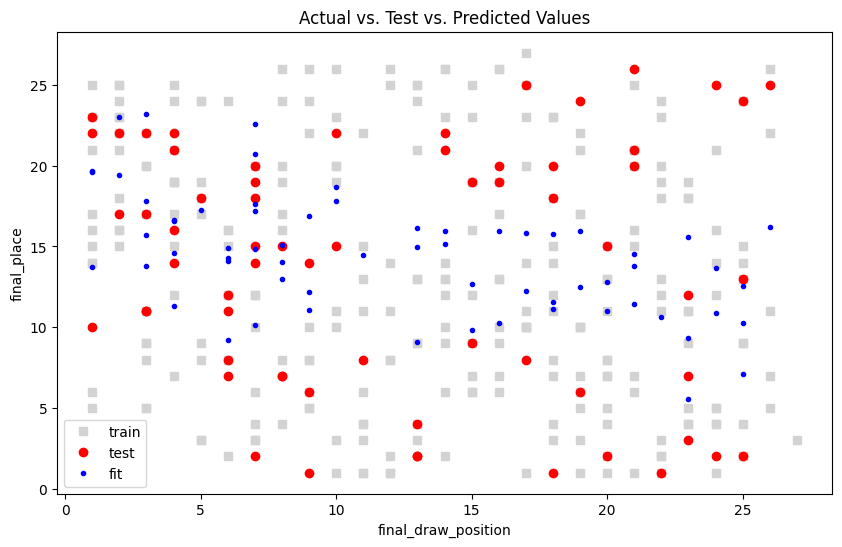

In [155]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['final_draw_position'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['final_draw_position'], ytest, 'ro', label="test")
plt.plot(Xtest['final_draw_position'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('final_draw_position')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend();

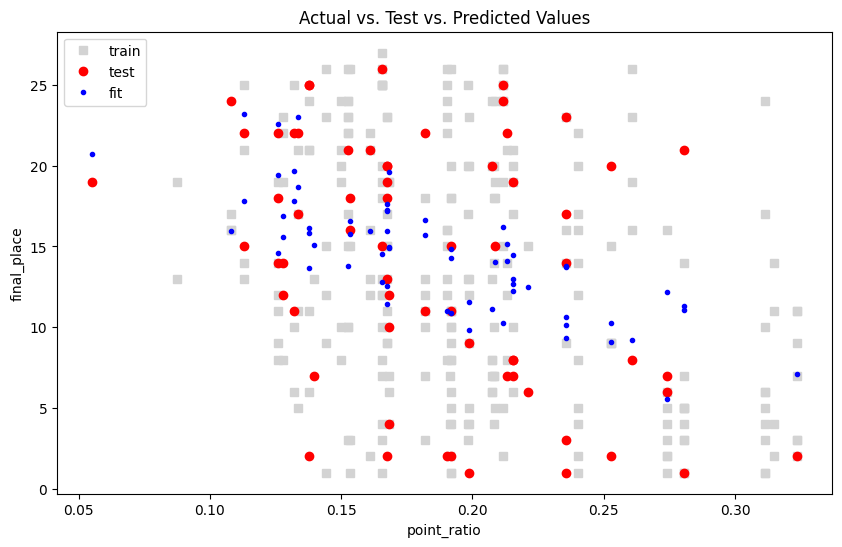

In [154]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['point_ratio'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['point_ratio'], ytest, 'ro', label="test")
plt.plot(Xtest['point_ratio'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('point_ratio')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend();

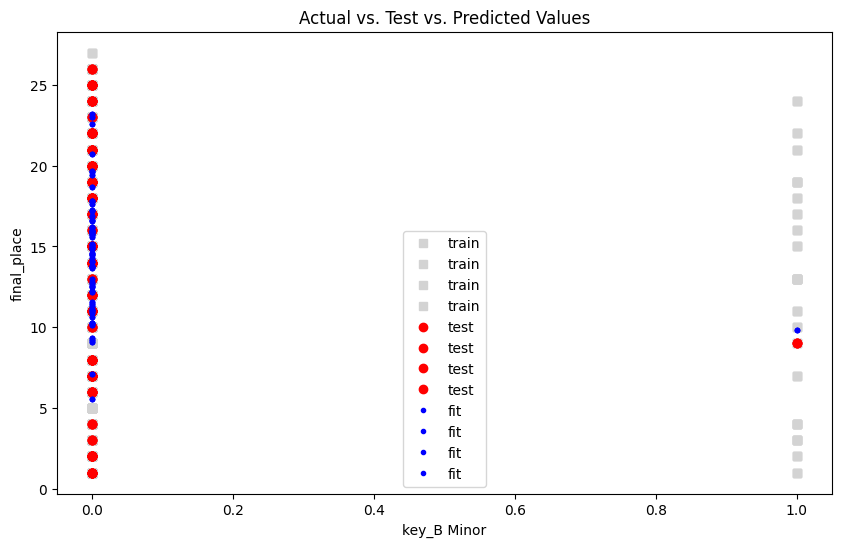

In [153]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['key_B Minor'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['key_B Minor'], ytest, 'ro', label="test")
plt.plot(Xtest['key_B Minor'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('key_B Minor')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend();

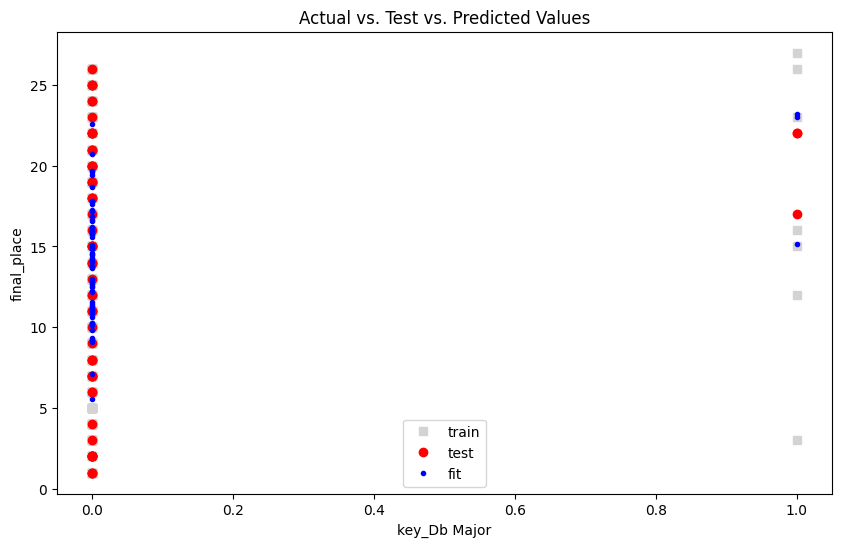

In [150]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['key_Db Major'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['key_Db Major'], ytest, 'ro', label="test")
plt.plot(Xtest['key_Db Major'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('key_Db Major')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend();

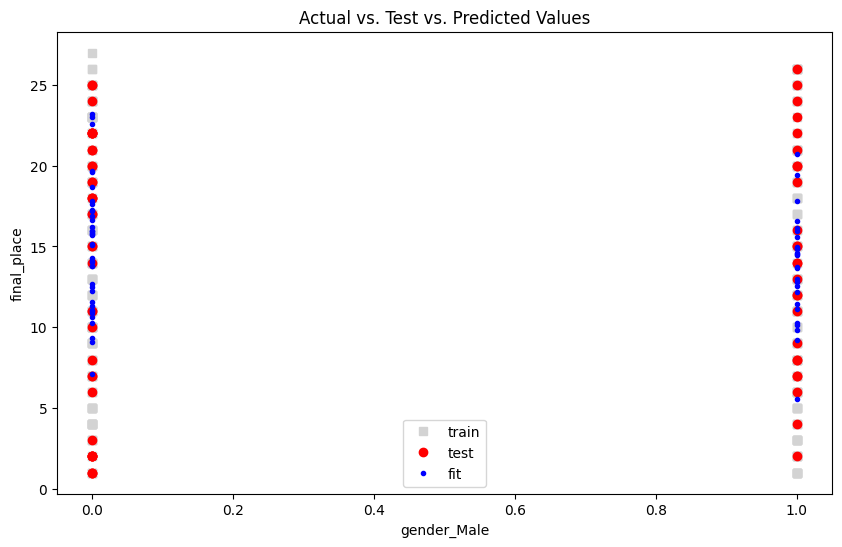

In [152]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['gender_Male'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['gender_Male'], ytest, 'ro', label="test")
plt.plot(Xtest['gender_Male'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('gender_Male')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend();

In [160]:
# Trying a new predictive model using the heatmapped variables, reduced

new_model_df = song_correlations[['point_ratio', 'final_place', 'final_draw_position', 'beats_per_min', 
                             'happiness', 'acousticness', 'instrumentalness', 'liveness', 'backing_singers', 
                             'backing_instruments', 'instrument_10', 'host_10', 'key_Ab Major', 'key_B Minor', 
                             'key_B Minor', 'key_Db Major', 'key_E Minor', 'key_Eb Major', 'key_Fs Major', 
                             'style_Rock', 'gender_Male']]

# removing null values

filter = ((new_model_df['final_draw_position'].notnull()) & (new_model_df['final_place'].notnull()) & (new_model_df['beats_per_min'].notnull()) & (new_model_df['happiness'].notnull()) & (new_model_df['acousticness'].notnull()) & 
          (new_model_df['point_ratio'].notnull()) & (new_model_df['backing_singers'].notnull()) & (new_model_df['host_10'].notnull()))
new_model_df = new_model_df[filter]

new_model_df.isnull().sum()

point_ratio            0
final_place            0
final_draw_position    0
beats_per_min          0
happiness              0
acousticness           0
instrumentalness       0
liveness               0
backing_singers        0
backing_instruments    0
instrument_10          0
host_10                0
key_Ab Major           0
key_B Minor            0
key_B Minor            0
key_Db Major           0
key_E Minor            0
key_Eb Major           0
key_Fs Major           0
style_Rock             0
gender_Male            0
dtype: int64

In [203]:
# Trying a new predictive model using select heatmapped variables, reduced

# Aiming to reject variables that would seem to have high multicolinearity


new_model_df = song_correlations[['final_place','point_ratio', 'beats_per_min', 'host_10']]


#removing NaN values for final place and making those who aren't in the final heavily weighted as doing poorly (i.e., below 26th)
new_model_df['final_place'] = new_model_df['final_place'].fillna(30)

# removing null values

filter = new_model_df['beats_per_min'].notnull()
new_model_df = new_model_df[filter]

# Choose the independent variable, the predictor X  

X = new_model_df[['point_ratio', 'beats_per_min', 'host_10']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = new_model_df[['final_place']]

/var/folders/bb/x10xqm6x59b9vj37y_w2nzzm0000gn/T/ipykernel_35019/342150938.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_model_df['final_place'] = new_model_df['final_place'].fillna(30)


In [204]:
# dividing the dataset into two subsets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42) #splittin the data into train and test dataset, 20% test 70% train

# Since our statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
Xtrain = sm.add_constant(Xtrain)
display(Xtrain.head())

,const,point_ratio,beats_per_min,host_10
482,1.0,0.165552,160.0,1
328,1.0,0.280753,122.0,0
25,1.0,0.215535,154.0,0
331,1.0,0.323564,120.0,0
49,1.0,0.144228,83.0,0


In [205]:
# create an OLS model
song_model = sm.OLS(ytrain, Xtrain)

# use the data to calculate the intercept and slope
model_results = song_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_place   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.47e-08
Time:                        12:33:00   Log-Likelihood:                -1372.9
No. Observations:                 376   AIC:                             2754.
Df Residuals:                     372   BIC:                             2770.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            27.1342      2.904      9.345      0.000      21.425      32.844
point_ratio     -54.3860      8.585     -6.335      0.000     -71.267     -37.505
beats_per_min     0.0170      0.020      0.830      0.407      -0.023       0.057
host_10          -0.5186      3.024     -0.172      0.864      -6.464       5.427
==============================================================================
Omnibus:                      163.378   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.624
Skew:                          -0.114   Prob(JB):                     2.02e-05
Kurtosis:                       1.847   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
# Add a constant to the test data for the intercept
Xtest = sm.add_constant(Xtest)

# Make predictions using the test data
y_pred = model_results.predict(Xtest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R^2)
r2 = r2_score(ytest, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 99.4541621643197
Root Mean Squared Error (RMSE): 9.97267076385858
R-squared (R^2): 0.14732262489078907


In [207]:
# adding test values and predicted values + calculating squared error for each record
y_pred.name = 'final_place_pred' # assigning a name to the y_pred Series, to get a column name below
df_eval = pd.concat([Xtest, ytest, y_pred], axis=1)
df_eval['squared_error'] = (df_eval['final_place'] - df_eval['final_place_pred'])**2
df_eval

,const,point_ratio,beats_per_min,host_10,final_place,final_place_pred,squared_error
59,1.0,0.235803,120.0,0,30.0,16.348635,186.359770
77,1.0,0.152709,105.0,0,3.0,20.612898,310.214184
36,1.0,0.274215,117.0,0,4.0,14.208565,104.214793
525,1.0,0.208074,115.0,0,10.0,17.771740,60.399945
500,1.0,0.208074,101.0,0,7.0,17.533878,110.962595
...,...,...,...,...,...,...,...
523,1.0,0.107986,138.0,0,30.0,23.605889,40.884650
142,1.0,0.221163,93.0,0,30.0,16.686086,177.260306
136,1.0,0.215535,88.0,0,21.0,16.907258,16.750536
458,1.0,0.125929,163.0,0,19.0,23.054796,16.441368


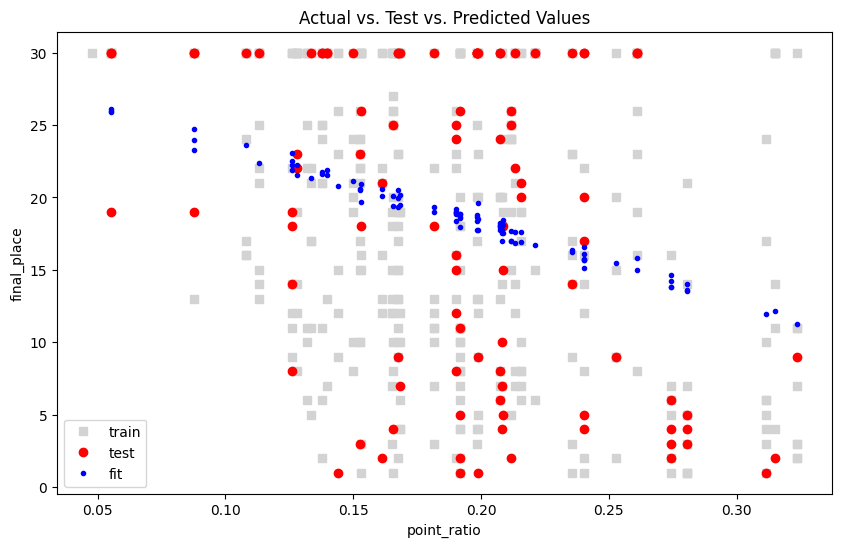

In [210]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['point_ratio'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['point_ratio'], ytest, 'ro', label="test")
plt.plot(Xtest['point_ratio'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('point_ratio')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
plt.savefig('maybe relationship between relationship ratio and final place?');

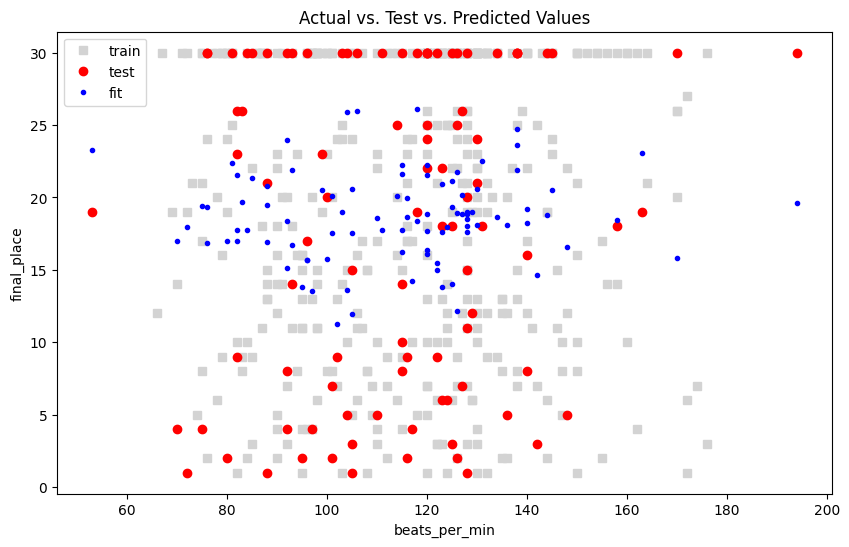

In [212]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(Xtrain['beats_per_min'], ytrain, 's', color='lightgray', label="train")
plt.plot(Xtest['beats_per_min'], ytest, 'ro', label="test")
plt.plot(Xtest['beats_per_min'], y_pred, 'bo', markersize=3, label="fit")

# Add labels and title
plt.xlabel('beats_per_min')
plt.ylabel('final_place')
plt.title('Actual vs. Test vs. Predicted Values')
plt.legend()
plt.savefig('maybe relationship between beats_per_min and final place?');